In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy as gp

## run g:Profiler with highly expressed gene sets

In [119]:
gprof = pd.read_csv('./gprofiler_noheader.csv', names = ['source', 'Go term', 'GO accession', 'adjusted_p_value', 'negative_log10_of_adjusted_p_value', 'term_size', 'query_size', 'intersection_size', 'effective_domain_size'], header = 0, index_col=False)


/var/folders/lg/3qbgfqss06l3_871lh9b19mw0000gn/T/ipykernel_37836/2213374707.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  gprof = pd.read_csv('./gprofiler_noheader.csv', names = ['source', 'Go term', 'GO accession', 'adjusted_p_value', 'negative_log10_of_adjusted_p_value', 'term_size', 'query_size', 'intersection_size', 'effective_domain_size'], header = 0, index_col=False)


In [120]:
go_sig = gprof[gprof['source'].isin(['GO:BP', 'GO:MF', 'GO:CC'])].sort_values(by='adjusted_p_value')


In [32]:
go_sig.head()

,source,Go term,GO accession,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,effective_domain_size
0,GO:MF,structural constituent of chromatin,GO:0030527,5.664291e-41,40.246854,109,275,36,25177
54,GO:CC,nucleosome,GO:0000786,1.191052e-37,36.924069,142,275,36,27262
55,GO:CC,protein-DNA complex,GO:0032993,1.922022e-28,27.716242,247,275,36,27262
20,GO:BP,nucleosome assembly,GO:0006334,1.108770e-26,25.955159,104,415,30,27205
57,GO:CC,CENP-A containing nucleosome,GO:0043505,1.245592e-26,25.904624,30,202,17,27262


In [126]:
source = pd.read_excel('~/Downloads/mmc6.xls', header=1)
source['scaled']= source['CLIP-seq number of valid members']/ source['CLIP-seq number of valid members'].mean()

In [127]:
map_df = pd.merge(go_sig, source, on='GO accession', how='inner')
map_df.head()

,source,Go term,GO accession,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,effective_domain_size,GO term,CLIP-seq number of valid members,CLIP-seq FDR,CLIP-seq log2 enrichment,RPF\nnumber of valid members,RPF\nFDR,RPF\nRibosome density change (log2),RNA-seq number of valid members,RNA-seq FDR,RNA-seq mRNA abundance change (log2),scaled
0,GO:CC,nucleosome,GO:0000786,1.191052e-37,36.924069,142,275,36,27262,nucleosome,41.0,5.623737e-08,3.974777,16.0,0.801140,-0.077319,14.0,0.916369,-0.028015,0.332544
1,GO:CC,protein-DNA complex,GO:0032993,1.922022e-28,27.716242,247,275,36,27262,protein-DNA complex,53.0,1.151607e-04,2.927450,27.0,0.244995,-0.182298,22.0,0.370202,0.054108,0.429875
2,GO:BP,nucleosome assembly,GO:0006334,1.108770e-26,25.955159,104,415,30,27205,nucleosome assembly,52.0,1.132644e-05,3.097357,27.0,0.354041,-0.173325,24.0,0.714862,-0.051149,0.421764
3,GO:BP,nucleosome organization,GO:0034728,3.740823e-24,23.427033,124,415,30,27205,nucleosome organization,62.0,2.045456e-04,2.563618,36.0,0.066411,-0.243319,30.0,0.618634,-0.052304,0.502872
4,GO:MF,protein heterodimerization activity,GO:0046982,4.102284e-19,18.386974,381,207,31,25177,protein heterodimerization activity,104.0,2.839717e-01,0.169706,106.0,0.769840,0.014458,71.0,0.246975,0.080775,0.843527


No handles with labels found to put in legend.


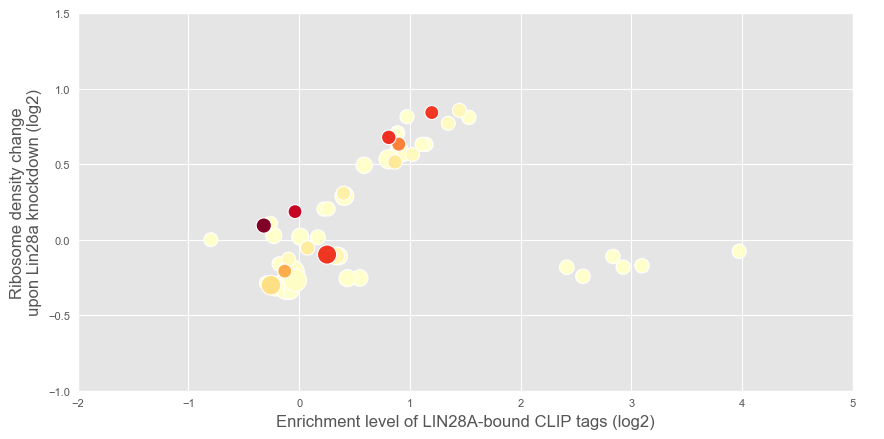

In [137]:
# norm = plt.Normalize(map_df['adjusted_p_value'].min(), map_df['adjusted_p_value'].max())
# sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=norm)
# sm.set_array([])
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
plt.figure(figsize=(10,5), dpi=100)
plt.xlim(-2,5)
plt.ylim(-1,1.5)
plt.style.use('seaborn-paper')
plt.xlabel('Enrichment level of LIN28A-bound CLIP tags (log2)', fontsize=12)
plt.ylabel('Ribosome density change\nupon Lin28a knockdown (log2)', fontsize=12)
sns.scatterplot(data = map_df,x='CLIP-seq log2 enrichment', y='RPF\nRibosome density change (log2)', palette="YlOrRd",hue='adjusted_p_value', size= 'CLIP-seq number of valid members', sizes=(100,400), legend= False)
legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1, fontsize=12)
plt.savefig('./gene_ontology.png', dpi=300, bbox_inches='tight')